<a href="https://colab.research.google.com/github/RaamRaam/blume-locus-hackathon/blob/master/Blume_Locus_PredictionEngine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to  Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Downloading File

In [0]:
file='/content/drive/My Drive/Locus-trail-data-Jan-to-May.csv'
!cp "$file" .

# Importing pandas and numpy libraries

In [0]:
import pandas as pd
import numpy as np

# Data Preparation



1.   remove outliers
2.   adjust time to IST.  what is provided in data is GMT
3.   Generate end co-ordinates and calculate time taken between two consecutive co-ordinates
4.  round off latitudes and longitudes to desired effect. Create new fields



In [0]:
data = pd.read_csv('Locus-trail-data-Jan-to-May.csv', sep=",", index_col=False,  names = ['user','s_lat','s_long','time'], skiprows=[0]).drop_duplicates()
data['date']=data['time'].str.slice(0,10) # date
data['year']=data['time'].str.slice(0,4) # year
data['month']=data['time'].str.slice(5,7) # month
data['day']=data['time'].str.slice(8,10) # day
data['hr']=data['time'].str.slice(11,13) # hour
data['min']=data['time'].str.slice(14,16) # minute
data['sec']=data['time'].str.slice(17,19) # Seconds
data[(data['s_long']<=77.71) & (data['s_long']>=77.666) & (data['s_lat']>=12.895) & (data['s_lat']<=12.94)] # filter outliers
data['starttime']=5.5+(data['hr'].astype(int)*60*60+data['min'].astype(int)*60+data['sec'].astype(int))/60 # starttime
data['starttime']=data['starttime'].mod(24)
data=data.sort_values(['user','month','day', 'hr','min','sec'], ascending=[True,True, True, True, True, True]) # sort order
data['endtime'] = data['starttime'].shift(-1) #get end time
data['user1'] = data['user'].shift(-1) 
data['day1'] = data['day'].shift(-1)
data['month1'] = data['month'].shift(-1)
data['d_lat'] = data['s_lat'].shift(-1) #end latitude
data['d_long'] = data['s_long'].shift(-1) #end longitude
data['timetaken']=data['endtime']-data['starttime'] # time taken
data['distance']=np.sqrt((data['s_lat']-data['d_lat'])**2+(data['s_long']-data['d_long'])**2) # distance
data['move']=1 # counter
# truncate halts
data=data[(data['user']==data['user1']) & (data['day']==data['day1'])  & (data['month']==data['month1']) & (data['timetaken']<=1.5)].drop(['date','time','year','hr','min','sec','user1','day1','month1'], axis=1)
data['s_lat3']=data['s_lat']
data['d_lat3']=data['d_lat']
data['s_long3']=data['s_long']
data['d_long3']=data['d_long']
rnd=3
data=data.round({'s_lat3': rnd, 's_long3': rnd,'d_lat3': rnd, 'd_long3': rnd})


## Sample route_list

In [0]:
route_list=[[12.93503,77.703815],[12.935127,77.703807],[12.935264,77.703796],[12.935772,77.703805],[12.935984,77.703796],[12.936226,77.703785],[12.936468,77.703768],[12.936519,77.703765],[12.936631,77.703454],[12.936767,77.703205],[12.936989,77.702725],[12.937169,77.702332],[12.937258,77.702098],[12.937619,77.701071],[12.937771,77.700637],[12.937798,77.700492],[12.937929,77.699834],[12.938012,77.699362],[12.938043,77.699207],[12.938089,77.699026],[12.938132,77.698836],[12.938186,77.698559],[12.938245,77.698274],[12.938229,77.69821],[12.938265,77.698035],[12.938305,77.697844],[12.938322,77.697792],[12.938463,77.697432],[12.938513,77.697386],[12.938597,77.697211],[12.938687,77.697026],[12.938722,77.696955],[12.938835,77.696724],[12.939009,77.696305],[12.93925,77.695676],[12.939347,77.69537],[12.939385,77.695257],[12.939401,77.69521],[12.939059,77.69498],[12.938665,77.694629],[12.938309,77.694268],[12.937493,77.693393],[12.937357,77.693339],[12.936668,77.692539],[12.935132,77.690853],[12.93474,77.690441],[12.932213,77.6877],[12.931473,77.686883],[12.931038,77.686439],[12.930299,77.685581],[12.929849,77.684925],[12.929615,77.684492],[12.929121,77.68343],[12.928435,77.681884],[12.927861,77.680651],[12.927788,77.680494],[12.927584,77.680078],[12.925664,77.676181],[12.924739,77.674229],[12.924626,77.673916],[12.924561,77.67375],[12.92373,77.671813],[12.923148,77.670551],[12.921949,77.668031],[12.921927,77.667985],[12.921813,77.668029],[12.921729,77.66787],[12.921357,77.667151],[12.920681,77.665641],[12.920592,77.665556],[12.920537,77.665543],[12.920494,77.665541],[12.920149,77.666362],[12.919931,77.666842],[12.919814,77.667054],[12.919561,77.667557],[12.919173,77.668294],[12.919072,77.668492],[12.918853,77.669054],[12.918689,77.669602],[12.918452,77.670303],[12.918366,77.670538],[12.918182,77.670975],[12.91789,77.671559],[12.917784,77.671766],[12.91768,77.671952],[12.917556,77.672197],[12.917421,77.672474]]

# Time calculation for each segment in the route

In [8]:
for i in range(len(route_list)-1):
  ns_lat=round(route_list[i][0],3)
  ns_long=round(route_list[i][1],3)
  nd_lat=round(route_list[i+1][0],3)
  nd_long=round(route_list[i+1][1],3)
  temp1=data[(data['s_lat3']==ns_lat) & (data['s_long3']==ns_long)]
  temp1['d']=np.sqrt((data['s_lat']-route_list[i][0])**2+(data['s_long']-route_list[i][1])**2) # distance
  user1=temp1.loc[temp1['d'].idxmin()]['user']
  month1=temp1.loc[temp1['d'].idxmin()]['month']
  day1=temp1.loc[temp1['d'].idxmin()]['day']
  starttime=temp1.loc[temp1['d'].idxmin()]['starttime']
  
  temp1=data[(data['d_lat3']==nd_lat) & (data['d_long3']==nd_long)]
  temp1['d']=np.sqrt((data['d_lat']-route_list[i+1][0])**2+(data['s_long']-route_list[i+1][1])**2) # distance
  user2=temp1.loc[temp1['d'].idxmin()]['user']
  month2=temp1.loc[temp1['d'].idxmin()]['month']
  day2=temp1.loc[temp1['d'].idxmin()]['day']
  endtime=temp1.loc[temp1['d'].idxmin()]['endtime']
  
  if user1==user2 and month1==month2 and day1==day2 and endtime>starttime:
    tt=2 if endtime-starttime>2 else endtime-starttime
  else:
    tt=1.
  print(i, 'tt:',tt)  
#   print(route_list[i],route_list[i+1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0 tt: 1.0
1 tt: 1.0
2 tt: 1.0
3 tt: 1.0
4 tt: 1.0
5 tt: 1.0
6 tt: 1.0
7 tt: 0.25
8 tt: 2
9 tt: 1.0
10 tt: 1.0
11 tt: 1.0
12 tt: 1.0
13 tt: 1.0
14 tt: 1.0
15 tt: 1.0
16 tt: 1.0
17 tt: 1.0
18 tt: 1.0
19 tt: 1.0
20 tt: 1.0
21 tt: 0.6166666666666742
22 tt: 1.0
23 tt: 1.0
24 tt: 1.0
25 tt: 1.0
26 tt: 1.0
27 tt: 1.0
28 tt: 1.0
29 tt: 1.0
30 tt: 1.0
31 tt: 1.0
32 tt: 1.0
33 tt: 1.0
34 tt: 1.0
35 tt: 1.0
36 tt: 1.0
37 tt: 1.0
38 tt: 1.0
39 tt: 1.0
40 tt: 1.0
41 tt: 1.0
42 tt: 1.0
43 tt: 1.0
44 tt: 1.0
45 tt: 1.0
46 tt: 1.0
47 tt: 1.0
48 tt: 1.0
49 tt: 1.0
50 tt: 1.0
51 tt: 1.0
52 tt: 1.0
53 tt: 1.0
54 tt: 1.0
55 tt: 1.0
56 tt: 1.0
57 tt: 1.0
58 tt: 1.0
59 tt: 1.0
60 tt: 1.0
61 tt: 1.0
62 tt: 1.0
63 tt: 1.0
64 tt: 1.0
65 tt: 1.0
66 tt: 1.0
67 tt: 1.0
68 tt: 1.0
69 tt: 1.0
70 tt: 1.0
71 tt: 1.0
72 tt: 1.0
73 tt: 1.0
74 tt: 1.0
75 tt: 1.0
76 tt: 1.0
77 tt: 1.0
78 tt: 1.0
79 tt: 1.0
80 tt: 1.0
81 tt: 1.0
82 tt: 1.0
83 tt: 1.0
84 tt: 1.0
85 tt: 1.0
86 tt: 1.0


## Diagnostics:  Number of times each segment in route is appearing in dataset after smoothing with rounded latitudes and longitudes

In [9]:
rnd=3
test=data.round({'s_lat': rnd, 's_long': rnd,'d_lat': rnd, 'd_long': rnd})
df = test.groupby(['s_lat','s_long','d_lat','d_long']).agg({'timetaken': 'mean','move': 'count' }).reset_index()
df['move'].value_counts()

# test

1       16409
2        4193
3        2048
4        1279
5         868
6         670
7         521
8         454
9         364
10        285
11        251
12        208
14        188
13        183
15        159
16        141
17        135
19        118
18        113
21         98
20         88
25         81
24         76
27         67
23         60
22         57
26         56
31         52
29         52
33         48
        ...  
389         1
325         1
245         1
532         1
420         1
292         1
244         1
196         1
164         1
148         1
1381        1
262         1
265         1
278         1
249         1
201         1
185         1
536         1
344         1
328         1
280         1
264         1
248         1
663         1
263         1
2958        1
215         1
1910        1
310         1
231         1
Name: move, Length: 306, dtype: int64

## Diagnostics: Each user has only 200 lat/long datapoints  per working day

In [23]:
tmp=pd.DataFrame(data['user']+'_'+data['day']+'_'+data['month']+'_'+(data['starttime']/60).apply(np.ceil).astype(str))
tmp.columns=['combine']
print(tmp['combine'].value_counts().to_csv())

User-13967_11_03_1.0,715
User-12435_03_01_1.0,706
User-12436_22_04_1.0,507
User-12440_06_04_1.0,470
User-12435_22_04_1.0,467
User-12436_02_03_1.0,461
User-12438_27_05_1.0,452
User-12436_03_05_1.0,447
User-12436_12_05_1.0,439
User-13971_05_04_1.0,431
User-12433_13_05_1.0,430
User-12436_05_05_1.0,429
User-12436_14_04_1.0,428
User-12438_12_05_1.0,427
User-13967_09_03_1.0,423
User-12436_09_04_1.0,422
User-13967_10_03_1.0,421
User-12436_23_04_1.0,418
User-12435_23_04_1.0,418
User-12440_01_04_1.0,418
User-13971_01_05_1.0,418
User-13971_19_04_1.0,411
User-12438_14_05_1.0,401
User-12436_07_04_1.0,400
User-12439_13_05_1.0,398
User-12439_10_04_1.0,395
User-12440_07_04_1.0,394
User-12440_31_03_1.0,393
User-12433_07_05_1.0,393
User-12440_08_04_1.0,391
User-13971_06_04_1.0,391
User-12440_09_04_1.0,390
User-12439_01_04_1.0,390
User-12436_05_03_1.0,389
User-12438_19_05_1.0,389
User-12435_17_04_1.0,385
User-12440_29_03_1.0,384
User-12439_14_03_1.0,381
User-12433_13_03_1.0,380
User-12439_14_04_1.0,378


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


User-13967_11_03_1.0,715
User-12435_03_01_1.0,706
User-12436_22_04_1.0,507
User-12440_06_04_1.0,470
User-12435_22_04_1.0,467
User-12436_02_03_1.0,461
User-12438_27_05_1.0,452
User-12436_03_05_1.0,447
User-12436_12_05_1.0,439
User-13971_05_04_1.0,431
User-12433_13_05_1.0,430
User-12436_05_05_1.0,429
User-12436_14_04_1.0,428
User-12438_12_05_1.0,427
User-13967_09_03_1.0,423
User-12436_09_04_1.0,422
User-13967_10_03_1.0,421
User-12436_23_04_1.0,418
User-12435_23_04_1.0,418
User-12440_01_04_1.0,418
User-13971_01_05_1.0,418
User-13971_19_04_1.0,411
User-12438_14_05_1.0,401
User-12436_07_04_1.0,400
User-12439_13_05_1.0,398
User-12439_10_04_1.0,395
User-12440_07_04_1.0,394
User-12440_31_03_1.0,393
User-12433_07_05_1.0,393
User-12440_08_04_1.0,391
User-13971_06_04_1.0,391
User-12440_09_04_1.0,390
User-12439_01_04_1.0,390
User-12436_05_03_1.0,389
User-12438_19_05_1.0,389
User-12435_17_04_1.0,385
User-12440_29_03_1.0,384
User-12439_14_03_1.0,381
User-12433_13_03_1.0,380
User-12439_14_04_1.0,378


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7f8b89eb8>]],
      dtype=object)

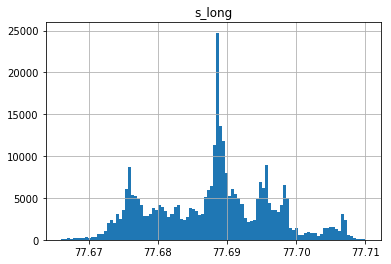

In [40]:
data[(data['s_long']<=77.71) & (data['s_long']>=77.666) & (data['s_lat']>=12.895) & (data['s_lat']<=12.94)].hist('s_long',bins=100)
# data.hist('s_long',bins=1000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f278f5cd048>]],
      dtype=object)

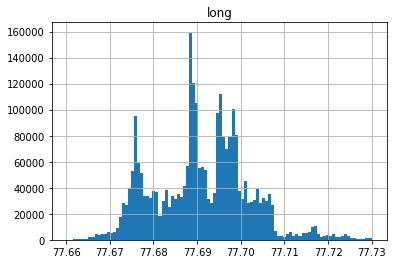

In [0]:
data[(data['long']<=77.73) & (data['long']>=77.66) & (data['lat']>=12.895) & (data['lat']<=12.94)].hist('long',bins=100)

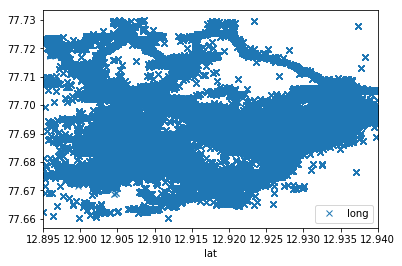

In [0]:
data.plot(x='lat', y='long', style='x')

In [0]:
data

In [128]:
# data.dtypes
len(data['user'].unique())
# 29 users
# data['user'].value_counts()
# pd.crosstab(data['user'],data['date'])
# test=data[(data['user']=='User-12436') & (data['month']=='07') & (data['day']=='01')][['lat','long','hr','min']]

19

In [0]:
# latlongs=data[['lat','long']].round({'lat': 4, 'long': 4}).drop_duplicates().sort_values(['lat', 'long'], ascending=[True, True]).iloc[::5, :]
# latlongs.reset_index(inplace=True)
# latlongs=latlongs.drop('index',1)
# distance=[]
# for i in latlongs.index:
#   base=(latlongs['lat'][i],latlongs['long'][i])
#   for j in range(i+1,len(latlongs)):
#     new=(latlongs['lat'][j],latlongs['long'][j])
#     distance.append([base,new,np.sqrt((new[1]-base[1])**2+(new[0]-base[0])**2)])
# #     print(len(distance))
#   if i>8000:
#     break
#   else:
#     if i%100==0:
#       print(len(distance))
  

(array([1.12900e+04, 2.46750e+04, 3.92290e+04, 5.05090e+04, 6.23150e+04,
        7.14760e+04, 8.30160e+04, 9.92300e+04, 1.07852e+05, 1.14950e+05,
        1.24911e+05, 1.39084e+05, 1.49231e+05, 1.58678e+05, 1.66171e+05,
        1.73552e+05, 1.78890e+05, 1.81514e+05, 1.85484e+05, 1.85971e+05,
        1.86498e+05, 1.88183e+05, 1.90102e+05, 1.93943e+05, 1.94605e+05,
        1.97666e+05, 1.95351e+05, 1.98631e+05, 1.96988e+05, 1.89933e+05,
        1.89564e+05, 1.85034e+05, 1.79374e+05, 1.71953e+05, 1.68438e+05,
        1.62980e+05, 1.53149e+05, 1.40010e+05, 1.28630e+05, 1.21434e+05,
        1.14577e+05, 1.05572e+05, 9.54590e+04, 8.44080e+04, 7.31820e+04,
        5.88870e+04, 4.61590e+04, 3.60130e+04, 2.94440e+04, 2.43980e+04,
        2.00840e+04, 1.60270e+04, 1.30190e+04, 9.57400e+03, 7.51000e+03,
        5.60700e+03, 3.82800e+03, 2.79100e+03, 1.89900e+03, 1.44000e+03,
        8.36000e+02, 5.59000e+02, 3.76000e+02, 1.63000e+02, 1.17000e+02,
        7.90000e+01, 6.40000e+01, 5.60000e+01, 2.00

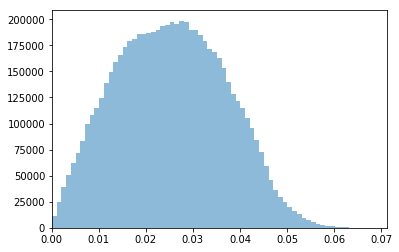

In [0]:
# print(min(b), max(b))
from matplotlib import pyplot as plt
b = [el[2] for el in distance]
bins = np.arange(min(b), max(b), 0.001)
plt.xlim([min(b), max(b)])
plt.hist(b, bins=bins, alpha=0.5)